In [1]:
# Dependencies and Setup
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined = clinical_df.merge(mouse_df, on="Mouse ID", how="inner")

# Display the data table for preview
combined.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = combined.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor).reset_index()

# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_std_err = combined.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_std_err_df = pd.DataFrame(tumor_std_err).reset_index()

# Preview DataFrame
tumor_std_err_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_pivot = mean_tumor_df.pivot_table(index=["Timepoint"],columns=["Drug"],values="Tumor Volume (mm3)")
tumor_std_err_pivot = tumor_std_err_df.pivot_table(index=["Timepoint"],columns=["Drug"],values="Tumor Volume (mm3)")

# Preview that Reformatting worked
mean_tumor_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


<Figure size 1080x720 with 0 Axes>

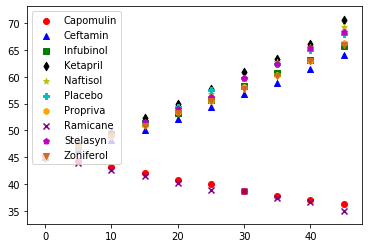

<Figure size 1080x720 with 0 Axes>

In [28]:

cols = mean_tumor_pivot.columns.tolist()
colors = ['r','b','g','k','y','c','orange','purple','m','chocolate']
markers = ['o','^','s','d','*','P','h','x','p','v']

for x in range(len(cols)):
    plt.scatter(x=mean_tumor_pivot.index, y=mean_tumor_pivot[cols[x]], color=colors[x], marker=markers[x], label=cols[x])
    #plt.errorbar(x=tumor_std_err_pivot.index, y=mean_tumor_pivot[cols[x]], yerr=tumor_std_err_pivot[cols[x]], color=colors[x], label=cols[x])
    
plt.legend(loc="upper left")

plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

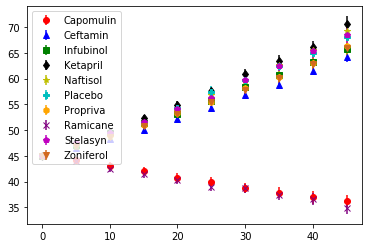

<Figure size 1080x720 with 0 Axes>

In [46]:

cols = mean_tumor_pivot.columns.tolist()
colors = ['r','b','g','k','y','c','orange','purple','m','chocolate']
markers = ['o','^','s','d','*','P','h','x','p','v']

for x in range(len(cols)):
    #plt.scatter(x=mean_tumor_pivot.index, y=mean_tumor_pivot[cols[x]], color=colors[x], marker=markers[x], label=cols[x])
    plt.errorbar(x=tumor_std_err_pivot.index, y=mean_tumor_pivot[cols[x]], yerr=tumor_std_err_pivot[cols[x]], 
                 marker=markers[x], color=colors[x], label=cols[x],fmt="o")
    
plt.legend(loc="upper left")

plt.figure(figsize=(15,10))

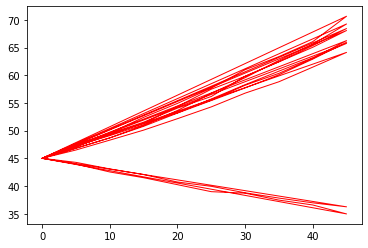

In [6]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.plot(mean_tumor_df["Timepoint"], mean_tumor_df["Tumor Volume (mm3)"], linewidth=1, color='r')
# Save the Figure



In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [31]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = combined.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met)
# Preview DataFrame
mean_met_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [32]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_std_err = combined.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
met_std_err_df = pd.DataFrame(met_std_err)

# Preview DataFrame
met_std_err_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [33]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_pivot = mean_met_df.pivot_table(index=["Timepoint"],columns=["Drug"],values="Metastatic Sites")
met_std_err_pivot = met_std_err_df.pivot_table(index=["Timepoint"],columns=["Drug"],values="Metastatic Sites")

# Preview that Reformatting worked
mean_met_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


<Figure size 1080x720 with 0 Axes>

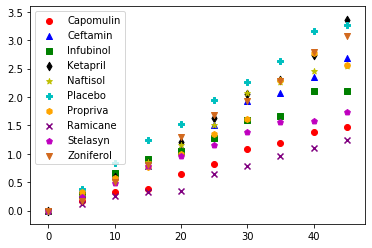

<Figure size 1080x720 with 0 Axes>

In [34]:
cols = mean_met_pivot.columns.tolist()
colors = ['r','b','g','k','y','c','orange','purple','m','chocolate']
markers = ['o','^','s','d','*','P','h','x','p','v']

for x in range(len(cols)):
    plt.scatter(x=mean_met_pivot.index, y=mean_met_pivot[cols[x]], color=colors[x], marker=markers[x], label=cols[x])
    #plt.errorbar(x=met_std_err_pivot.index, y=mean_met_pivot[cols[x]], yerr=met_std_err_pivot[cols[x]], color=colors[x], label=cols[x])
    
plt.legend(loc="upper left")

plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

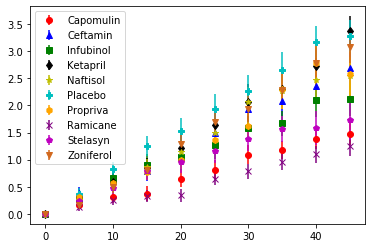

<Figure size 1080x720 with 0 Axes>

In [45]:
cols = mean_met_pivot.columns.tolist()
colors = ['r','b','g','k','y','c','orange','purple','m','chocolate']
markers = ['o','^','s','d','*','P','h','x','p','v']

for x in range(len(cols)):
    #plt.scatter(x=mean_met_pivot.index, y=mean_met_pivot[cols[x]], color=colors[x], marker=markers[x], label=cols[x])
    plt.errorbar(x=met_std_err_pivot.index, y=mean_met_pivot[cols[x]], yerr=met_std_err_pivot[cols[x]], 
                 marker=markers[x], color=colors[x], label=cols[x],fmt="o")
    
plt.legend(loc="upper left")

plt.figure(figsize=(15,10))

In [11]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [86]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = combined.groupby(["Drug","Timepoint"])["Mouse ID"].count()
max_mice = survival.reset_index().groupby("Drug")["Mouse ID"].max()
#survival["Rates"] = survival["Mouse ID"]/max_mice

# Convert to DataFrame
survival_df = pd.DataFrame(survival).reset_index()
survival_df = survival_df.merge(pd.DataFrame(max_mice).rename(columns={"Mouse ID":"Count"}), on="Drug")
survival_df["Rates"] = survival_df["Mouse ID"]/survival_df["Count"]*100

# Preview DataFrame
survival_df.head()


,Drug,Timepoint,Mouse ID,Count,Rates
0,Capomulin,0,25,25,100.0
1,Capomulin,5,25,25,100.0
2,Capomulin,10,25,25,100.0
3,Capomulin,15,24,25,96.0
4,Capomulin,20,23,25,92.0


In [83]:
# Minor Data Munging to Re-Format the Data Frames
survival_pivot = survival_df.pivot_table(index=["Timepoint"],columns=["Drug"],values="Rates")

# Preview the Data Frame
survival_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


<Figure size 1080x720 with 0 Axes>

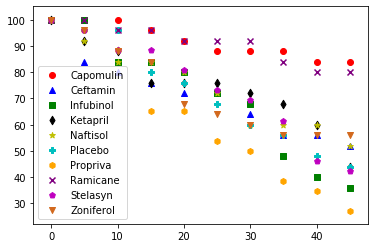

<Figure size 1080x720 with 0 Axes>

In [89]:
cols = mean_met_pivot.columns.tolist()
colors = ['r','b','g','k','y','c','orange','purple','m','chocolate']
markers = ['o','^','s','d','*','P','h','x','p','v']

for x in range(len(cols)):
    plt.scatter(x=survival_pivot.index, y=survival_pivot[cols[x]], color=colors[x], marker=markers[x], label=cols[x])
    #plt.errorbar(x=met_std_err_pivot.index, y=mean_met_pivot[cols[x]], yerr=met_std_err_pivot[cols[x]], color=colors[x], label=cols[x])
    
plt.legend(loc="lower left")

plt.figure(figsize=(15,10))

In [14]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [110]:
# Calculate the percent changes for each drug
percent_change = ((mean_tumor_pivot.iloc[-1,:] - mean_tumor_pivot.iloc[0,:])/mean_tumor_pivot.iloc[0,:]*100)
# Display the data to confirm
percent_change

-19.475302667894155
42.516491855897414
46.12347172785184
57.02879468660604
53.923347134769195
51.29796048315153
47.24117486320634
-22.32090046276666
52.085134287898995
46.57975086509522


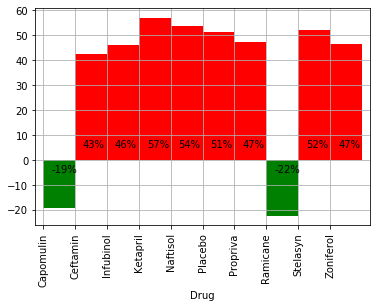

In [131]:
fig, ax = plt.subplots()
colors = ['g' if x < 0 else 'r' for x in percent_change]
percent_change.plot(kind="bar",color=colors, align="edge",width=1)
plt.xticks(np.arange(len(percent_change)),percent_change.index.get_values())
plt.xlim=(-0.75,len(percent_change)-0.25)
plt.ylim=(percent_change.min()-5,percent_change.max()+5)

for x in range(len(percent_change)):
    if percent_change[x] < 0:
        ax.text(x+.25,-5,"{:.0%}".format(percent_change[x]/100))
    else:
        ax.text(x+.25,5,"{:.0%}".format(percent_change[x]/100))

plt.grid()

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)